<a href="https://colab.research.google.com/github/JochenFreddy/QGISAutomation/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [ ]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [ ]:
kmeans = KMeans(
    init= "random",
    n_clusters=3,
    n_init=10,
    max_iter = 300,
    random_state=42
)

In [ ]:
kmeans.fit(scaled_features)

In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

NameError: ignored

In [ ]:
kl = KneeLocator(
    range(1,11),sse,curve= "convex",direction="decreasing"
)
kl.elbow

3

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Erta_Ale.csv to Erta_Ale.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Erta_Ale.csv']))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Nyiragongo.csv to Nyiragongo.csv


In [ ]:
df5 = pd.read_csv(io.BytesIO(uploaded['Nyiragongo.csv']))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Kilauea.csv to Kilauea.csv


In [ ]:
df6 = pd.read_csv(io.BytesIO(uploaded['Kilauea.csv']))

In [ ]:
frames = [df2,df5,df6]
df2 = pd.concat(frames)

In [ ]:
df2

,state,p7,p6,p5
0,3.0,1158,1254,1778
1,3.0,1283,1403,2065
2,3.0,1452,1454,2229
3,3.0,1496,1424,2324
4,3.0,1555,1539,2206
...,...,...,...,...
104085,1.0,1511,595,537
104086,1.0,1510,889,918
104087,1.0,1593,921,930
104088,1.0,1619,582,543


In [ ]:
#df3 = df2.loc[:, df2.columns != 'state']
df3 = df2
df3['p7/6'] = df3['p7']/df3['p6']
df3['p7/5'] = df3['p7']/df3['p5']
df3['p6/5'] = df3['p6']/df3['p5']
df3['S7'] = df3['p7']>10000
df3['S6'] = df3['p6']>10000
df3['b7'] = df3['p7']>1500
df3['b6'] = df3['p6'] >5000
df3['S7'] = df3['S7'].astype(int)
df3['S6'] = df3['S6'].astype(int)
df3['b7'] = df3['b7'].astype(int)
df3['b6'] = df3['b6'].astype(int)
df3

,state,p7,p6,p5,p7/6,p7/5,p6/5,S7,S6,b7,b6
0,3.0,1158,1254,1778,0.923445,0.651294,0.705287,0,0,0,0
1,3.0,1283,1403,2065,0.914469,0.621308,0.679419,0,0,0,0
2,3.0,1452,1454,2229,0.998624,0.651413,0.652310,0,0,0,0
3,3.0,1496,1424,2324,1.050562,0.643718,0.612737,0,0,0,0
4,3.0,1555,1539,2206,1.010396,0.704896,0.697643,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
104085,1.0,1511,595,537,2.539496,2.813780,1.108007,0,0,1,0
104086,1.0,1510,889,918,1.698538,1.644880,0.968410,0,0,1,0
104087,1.0,1593,921,930,1.729642,1.712903,0.990323,0,0,1,0
104088,1.0,1619,582,543,2.781787,2.981584,1.071823,0,0,1,0


Test without PCA

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df3)

kmeans = KMeans(n_clusters=9)
dbscan = DBSCAN(eps=0.3)

kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

kmeans_silhouette = silhouette_score(
    scaled_features,kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
    scaled_features, dbscan.labels_
).round(2)



In [ ]:
print(kmeans_silhouette)

print(dbscan_silhouette)

0.53
0.42


Test with PCA

In [ ]:
def myplot(score, coeff, labels=None):
  xs = score[:,0]
  ys = score[:,1]
  n= coeff.shape[0]
  scalex = 1.0/(xs.max() - xs.min())
  scaley = 1.0/(ys.max() - ys.min())
  plt.scatter(xs * scalex, ys * scaley)
  for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(1))
  plt.ylabel("PC{}".format(2))
  plt.grid()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
preprocessor = Pipeline(
    [
     ("scaler", MinMaxScaler()),
     ("pca", PCA(n_components = 2, random_state=42)),
    ]
)
my_model= PCA(n_components=2, random_state=42)
X_new = my_model.fit_transform(df3)
my_model.explained_variance_
my_model.explained_variance_ratio_
#my_model.explained_variance_ratio_.cumsum()
#abs(my_model.components_)

array([0.78660675, 0.12765132])

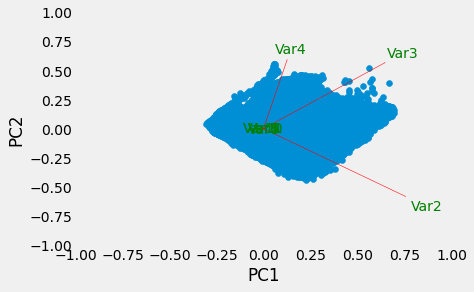

In [ ]:
myplot(X_new[:,0:2], np.transpose(my_model.components_[0:2, :]))
plt.show()

In [ ]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(df2.state)
label = df2.state.unique()
n_clusters = len(label)

In [175]:

clusterer = Pipeline(
    [
     (
         "kmeans",
      KMeans(
          n_clusters = 18,
          init="k-means++",
          n_init=100,
          max_iter = 500,
          random_state =None,
      ),
     ),
    ]
)

In [176]:
pipe = Pipeline(
    [("preprocessor", preprocessor),
     ("clusterer", clusterer)
     ]
)
pipe.fit(df3)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=18,
                                         n_init=100))]))])

In [177]:
preprocessed_data = pipe["preprocessor"].transform(df3)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.676508209000606

In [178]:
adjusted_rand_score(true_labels,predicted_labels)

0.26974377382617837

In [179]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(df3),
    columns=["component_1","component_2"],
)
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


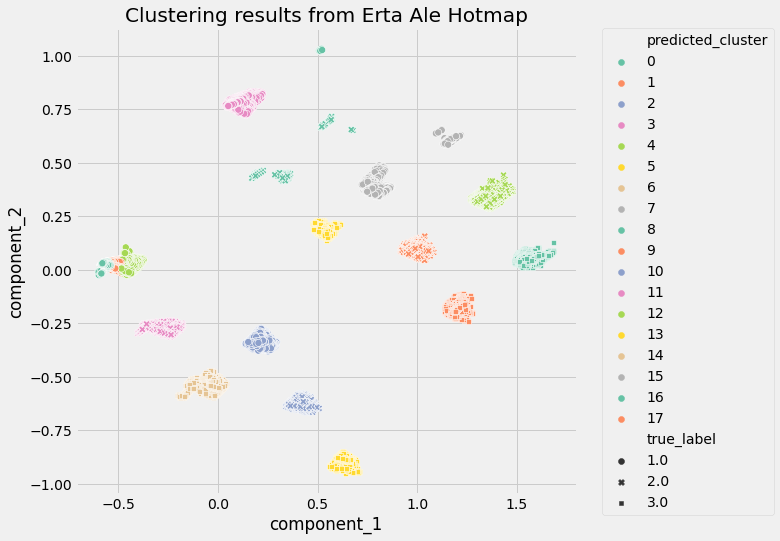

In [180]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df3.index.values
cluster_map['cluster'] = pipe["clusterer"]["kmeans"].labels_

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette= "Set2",
)

scat.set_title(
    "Clustering results from Erta Ale Hotmap"
    )
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad= 0.0)

plt.show()

state
1.0    7006
2.0    2394
3.0    2184
dtype: int64

(0.0, 7.0)

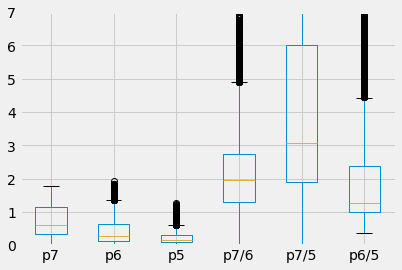

In [181]:
df4 = df2.loc[:, df2.columns == 'state']
d = cluster_map[cluster_map.cluster == 4].join(df3,lsuffix=('3'), rsuffix='4')
occur = d.groupby(['state']).size()
display(occur)
d['p7'] = d['p7']/10000
d['p6'] = d['p6']/10000
d['p5'] = d['p5']/10000
d
boxplot = d.boxplot(column =['p7','p6','p5', 'p7/6','p7/5','p6/5'])
boxplot.set_ylim(0,7)

In [ ]:
silhouette_scores= []
ari_scores = []
for n in range(2,11):
  pipe["preprocessor"]["pca"].n_components = n
  pipe.fit(df3)

  silhouette_coef = silhouette_score(
      pipe["preprocessor"].transform(df3),
      pipe["clusterer"]["kmeans"].labels_,
  )
  ari = adjusted_rand_score(
      true_labels,
      pipe["clusterer"]["kmeans"].labels_,
  )

  silhouette_scores.append(silhouette_coef)
  ari_scores.append(ari)


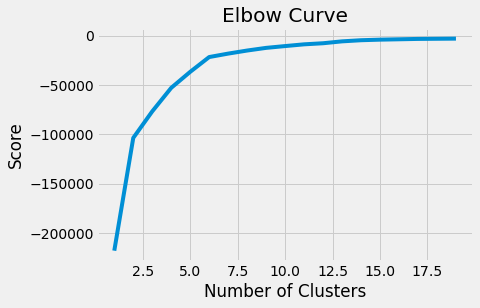

In [159]:
from sklearn import preprocessing
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df3)
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df3.index, columns=df3.columns[:])
df_numeric_scaled.head()

Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

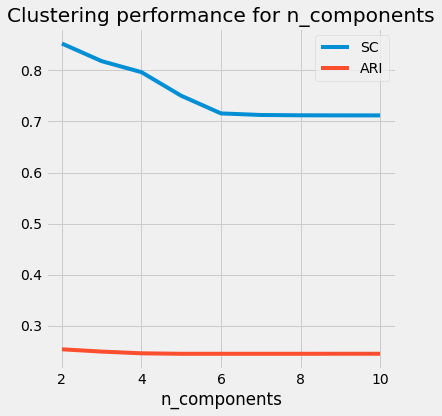

In [ ]:
from IPython.core.pylabtools import figsize
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6,6))
plt.plot(
    range(2,11),
    silhouette_scores,
    c="#008fd5",
    label="SC",
)
plt.plot(range(2,11), ari_scores, c="#fc4f30", label="ARI")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering performance for n_components")
plt.tight_layout()
plt.show()